# Задача 4. Ансамбли

## Задача
* Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
* Выполнить разведочный анализ (EDA). При необходимости выполнить полезные преобразования данных.
* Самостоятельно реализуйте алгоритмы Bagging ИЛИ AdaBoost, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.
* Обучите ансамбли для каких-то простых моделей, используя свои две реализации, а также реализации из sklearn (Bagging, Random Forest, AdaBoost, Gradient Tree Boosting, Histogram-Based Gradient Boosting).
* При обучении использовать подбор гиперпараметров, кросс-валидацию.
* Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества, построить матрицы ошибок.
* (+2 балла) Также добавить в сравнение модели из библиотек XGBoost, LightGBM и CatBoost.
* (+3 балла) Для подбора гиперпараметров использовать фреймворк Optuna.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Данные

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Набор данных включает информацию о: <br>

Клиентах, которые ушли в течение последнего месяца — колонка «Churn». <br>

Услуги, на которые подписался каждый клиент: телефон, несколько линий, Интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройства, техническая поддержка, потоковое телевидение и фильмы. <br>

Информация об учетной записи клиента — как долго он был клиентом, контракт, способ оплаты, безбумажный биллинг, ежемесячные платежи и общие платежи. <br>

Демографическая информация о клиентах — пол, возрастной диапазон, наличие партнеров и иждивенцев. <br>

## Описание данных
* customerID: Customer ID
* genderCustomer: gender (female, male)
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* PartnerWhether: the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* numAdminTickets: The number of Admin Ticket
* numTechTickets: The number of Tech Ticket
* Churn: Whether the customer churned or not (Yes or No)

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Разведочный анализ (EDA)

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop(columns= 'customerID', axis=1, inplace=True)

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(how = 'any', inplace = True)

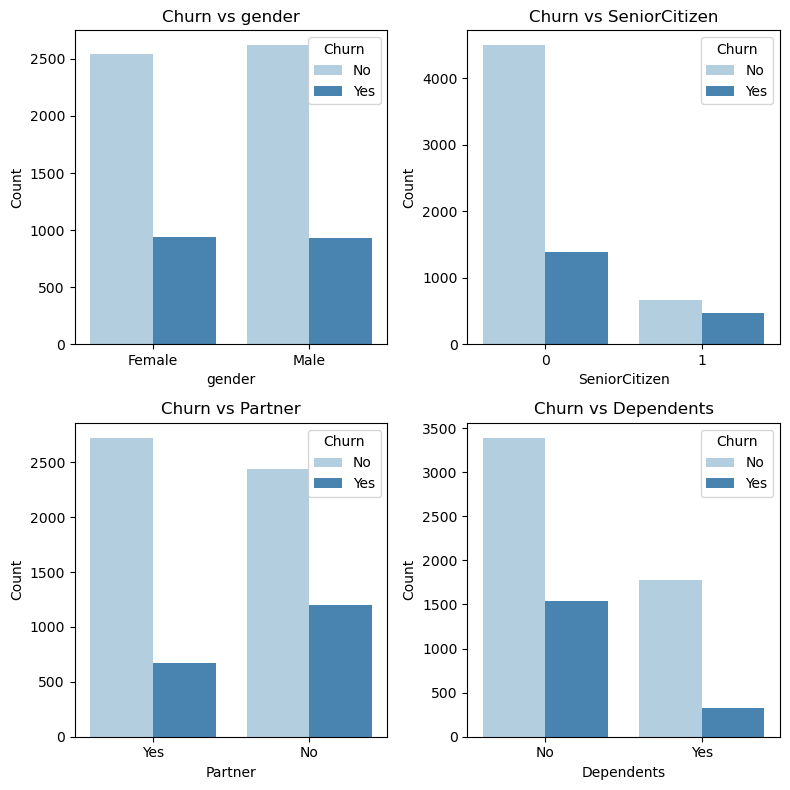

In [10]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax, palette='Blues')
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()

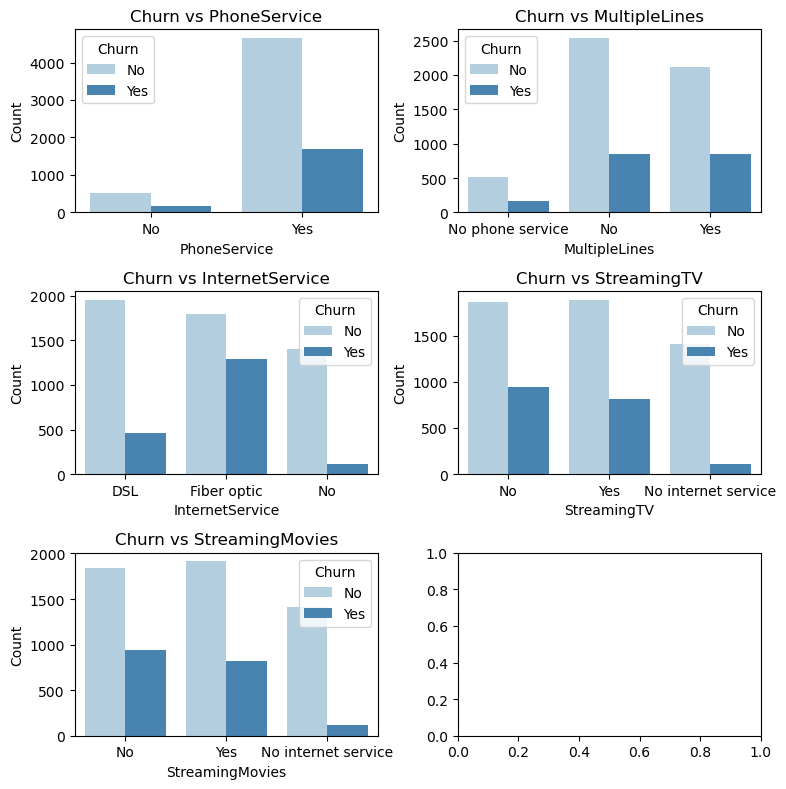

In [11]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax, palette='Blues')
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

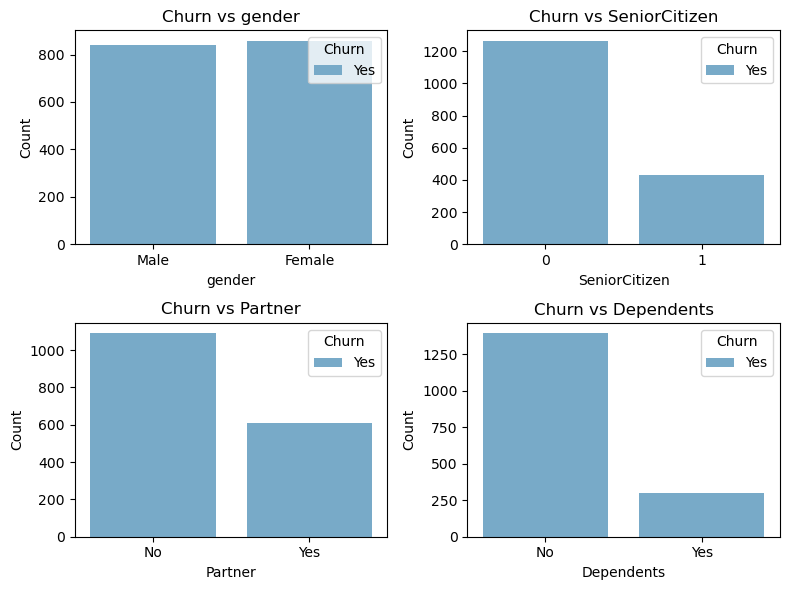

In [12]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax, palette='Blues')
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Contract', ylabel='count'>

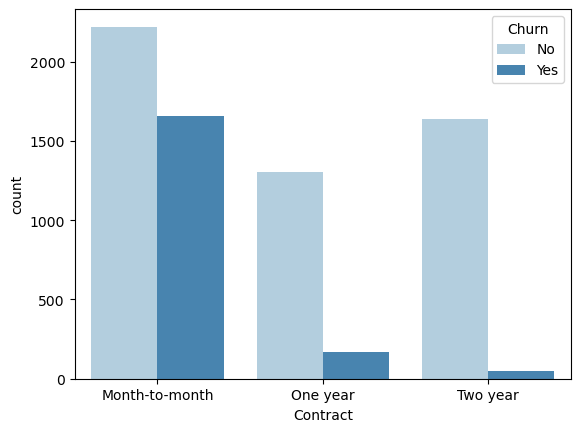

In [13]:
sns.countplot(data=df, x=df['Contract'], hue='Churn', palette='Blues')

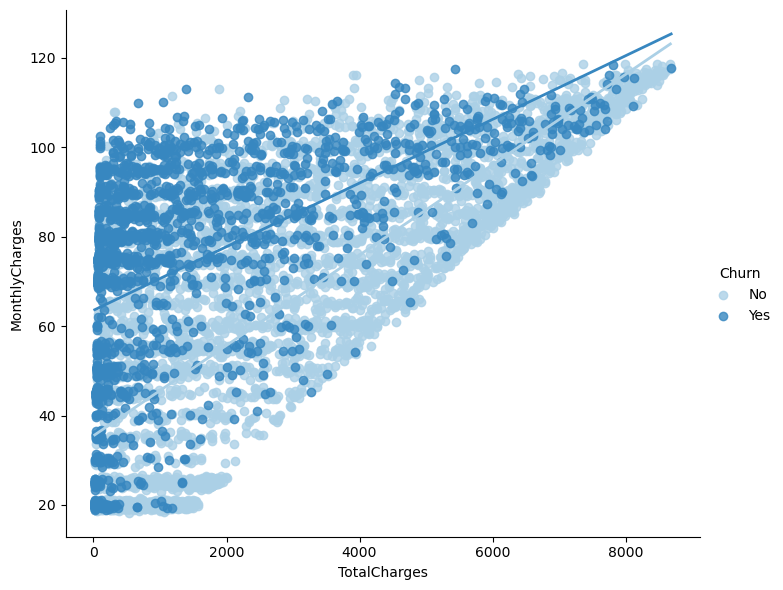

In [14]:
sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Blues', line_kws={'linewidth': 2})
sns.despine()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
X = pd.get_dummies(df.drop('Churn', axis = 1))
le = LabelEncoder()
y = df['Churn']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=13331, stratify=y)

In [17]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
from sklearn.tree import DecisionTreeClassifier
from numpy.random import randint
from sklearn.metrics import accuracy_score

Функция для определения времени обучения

In [19]:
import time 

def check_time(model, X, y):
    times = []
    for _ in range(10):
        start = time.time()
        model.fit(X, y)
        times.append(time.time() - start)
    mean_time = np.array(times).mean()
    return f'Среднее время обучения модели {round(mean_time, 2)} сек.'

## Реализация алгоритма Bagging

In [20]:
class MyBaggingClassifier():

    
    def fit(self, X, y, n_estimators=100):
        self.estimators = []
        max_features = int(np.sqrt(X.shape[1]))
        
        for _ in range(n_estimators):
            tree = DecisionTreeClassifier(random_state=randint(X.shape[0]),
                                          max_features=max_features).fit(X, y)
            self.estimators.append(tree)
            
        return self
    
    def predict_proba(self, X):
        self.predictions = np.zeros((X.shape[0], 2))
        
        for tree in self.estimators:
            prediction = tree.predict_proba(X)
            self.predictions += prediction
            
        self.predictions = self.predictions / len(self.estimators)
        
        return self.predictions
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1).reshape(-1, 1)

In [21]:
baggingclf = MyBaggingClassifier()

In [22]:
baggingclf.fit(X_train, y_train)

In [23]:
baggingclf.predict(X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [24]:
model_accuracies = {}

In [25]:
y_true = y_test
y_pred = baggingclf.predict(X_test)
model_accuracies['My Bagging Classifier'] = accuracy_score(y_true, y_pred)
print("test score:", model_accuracies['My Bagging Classifier'])

test score: 0.7741477272727273


In [26]:
check_time(baggingclf, X_train, y_train)

'Среднее время обучения модели 0.76 сек.'

## Optuna

In [27]:
import optuna
from optuna.distributions import IntDistribution, FloatDistribution
from optuna.integration import OptunaSearchCV

## Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bc_params = {'n_estimators' : IntDistribution(low=10, high=300,step=50),
             "base_estimator__max_depth": IntDistribution(low=2, high=20,step=2),
             "base_estimator__min_samples_leaf": IntDistribution(low=2, high=20,step=2),
             "base_estimator__min_samples_split": IntDistribution(low=2, high=20,step=2)   
}
bc_gs = OptunaSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=958), random_state=958),
                       param_distributions=bc_params, cv=5, verbose=1, n_jobs=-1)

In [30]:
bc_gs.fit(X_train, y_train)
print("best score: ", bc_gs.best_score_)
print("best param: ", bc_gs.best_params_)
model_accuracies['Bagging Classifier'] = bc_gs.score(X_test, y_test)
print("test score:", model_accuracies['Bagging Classifier'])

[I 2023-04-15 14:13:19,134] A new study created in memory with name: no-name-6e8ceb2a-d4dc-45c1-8d02-ddc2b05a89db
[I 2023-04-15 14:13:19,135] Searching the best hyperparameters using 6328 samples...
[I 2023-04-15 14:13:20,645] Trial 6 finished with value: 0.7964612954186413 and parameters: {'n_estimators': 10, 'base_estimator__max_depth': 16, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 10}. Best is trial 6 with value: 0.7964612954186413.
[I 2023-04-15 14:13:20,663] Trial 9 finished with value: 0.7928241824800655 and parameters: {'n_estimators': 10, 'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 10}. Best is trial 6 with value: 0.7964612954186413.
[I 2023-04-15 14:13:20,668] Trial 3 finished with value: 0.7947222898675607 and parameters: {'n_estimators': 10, 'base_estimator__max_depth': 14, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 8}. Best is trial 6 with val

best score:  0.7989894410829915
best param:  {'n_estimators': 260, 'base_estimator__max_depth': 12, 'base_estimator__min_samples_leaf': 12, 'base_estimator__min_samples_split': 20}
test score: 0.8053977272727273


In [31]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=20, random_state=958),
                            n_estimators=260,
                            random_state=958)
bagging.fit(X_train, y_train)
print("train accuracy:", bagging.score(X_train, y_train))
print("test accuracy:", bagging.score(X_test, y_test))

train accuracy: 0.8516118836915297
test accuracy: 0.8096590909090909


In [32]:
check_time(bagging, X_train, y_train)

'Среднее время обучения модели 3.01 сек.'

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_params = {
             'n_estimators':IntDistribution(low=10, high=300,step=50),
             'min_samples_split':IntDistribution(low=2, high=20,step=2),
             'max_depth':IntDistribution(low=2, high=20,step=2),
            'min_samples_leaf':IntDistribution(low=1, high=20,step=2)
}
rf_gs = OptunaSearchCV(RandomForestClassifier(random_state=958),
                       param_distributions=rf_params, cv=5, verbose=1, n_jobs=-1)

In [35]:
rf_gs.fit(X_train, y_train)
print("best score: ", rf_gs.best_score_)
print("best param: ", rf_gs.best_params_)
model_accuracies['Random Forest'] = rf_gs.score(X_test, y_test)
print("test score:", model_accuracies['Bagging Classifier'])

[I 2023-04-15 14:14:16,052] A new study created in memory with name: no-name-d2d23b10-d197-4342-9275-1798de10c766
[I 2023-04-15 14:14:16,052] Searching the best hyperparameters using 6328 samples...
[I 2023-04-15 14:14:17,119] Trial 9 finished with value: 0.7981996765512116 and parameters: {'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 15}. Best is trial 9 with value: 0.7981996765512116.
[I 2023-04-15 14:14:18,555] Trial 4 finished with value: 0.7455763070640467 and parameters: {'n_estimators': 60, 'min_samples_split': 10, 'max_depth': 2, 'min_samples_leaf': 1}. Best is trial 9 with value: 0.7981996765512116.
[I 2023-04-15 14:14:19,692] Trial 5 finished with value: 0.79598661246714 and parameters: {'n_estimators': 60, 'min_samples_split': 18, 'max_depth': 6, 'min_samples_leaf': 3}. Best is trial 9 with value: 0.7981996765512116.
[I 2023-04-15 14:14:20,902] Trial 2 finished with value: 0.7902972856527358 and parameters: {'n_estimators': 110, 'min_sampl

best score:  0.800728446634072
best param:  {'n_estimators': 210, 'min_samples_split': 12, 'max_depth': 8, 'min_samples_leaf': 3}
test score: 0.8053977272727273


In [36]:
randomforest = RandomForestClassifier(n_estimators=210, min_samples_split=12, max_depth=8, min_samples_leaf=3, random_state=958)
randomforest.fit(X_train, y_train)
print("train accuracy:", randomforest.score(X_train, y_train))
print("test accuracy:", randomforest.score(X_test, y_test))

train accuracy: 0.8511378002528445
test accuracy: 0.8167613636363636


In [37]:
check_time(randomforest, X_train, y_train)

'Среднее время обучения модели 0.2 сек.'

## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ab_params = {
          'learning_rate' : FloatDistribution(low=0.1, high=1.5,step=0.1),
          'n_estimators': IntDistribution(low=10, high=300,step=50),
          "base_estimator__max_depth": IntDistribution(low=2, high=20,step=2),
          "base_estimator__min_samples_leaf": IntDistribution(low=1, high=20,step=2),
          "base_estimator__min_samples_split": IntDistribution(low=2, high=20,step=2)
}
ab_gs = OptunaSearchCV(AdaBoostClassifier(DecisionTreeClassifier(), random_state=958),
                       param_distributions=ab_params, cv=5, verbose=1, n_jobs=-1)

In [40]:
ab_gs.fit(X_train, y_train)
print("best score: ", ab_gs.best_score_)
print("best param: ", ab_gs.best_params_)
model_accuracies['AdaBoost Classifier'] = ab_gs.score(X_test, y_test)
print("test score:", model_accuracies['AdaBoost Classifier'])

[I 2023-04-15 14:14:28,497] A new study created in memory with name: no-name-eca3890f-98c0-46c9-a521-66f29684b25e
[I 2023-04-15 14:14:28,498] Searching the best hyperparameters using 6328 samples...
[I 2023-04-15 14:14:30,155] Trial 7 finished with value: 0.7455781803195773 and parameters: {'learning_rate': 1.1, 'n_estimators': 10, 'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 7, 'base_estimator__min_samples_split': 20}. Best is trial 7 with value: 0.7455781803195773.
[I 2023-04-15 14:14:41,077] Trial 5 finished with value: 0.7471563356624145 and parameters: {'learning_rate': 0.9, 'n_estimators': 110, 'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 8}. Best is trial 5 with value: 0.7471563356624145.
[I 2023-04-15 14:14:42,398] Trial 1 finished with value: 0.7575871219926443 and parameters: {'learning_rate': 1.0, 'n_estimators': 110, 'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 7, '

best score:  0.7681750120200563
best param:  {'learning_rate': 1.2000000000000002, 'n_estimators': 160, 'base_estimator__max_depth': 16, 'base_estimator__min_samples_leaf': 9, 'base_estimator__min_samples_split': 12}
test score: 0.7585227272727273


In [41]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=16, min_samples_leaf=9, min_samples_split=12),
                             learning_rate=1.2, n_estimators=160, random_state=958)
adaboost.fit(X_train, y_train)
print("train accuracy:", adaboost.score(X_train, y_train))
print("test accuracy:", adaboost.score(X_test, y_test))

train accuracy: 0.997629582806574
test accuracy: 0.7798295454545454


In [42]:
check_time(adaboost, X_train, y_train)

'Среднее время обучения модели 5.01 сек.'

## CatBoost

In [43]:
from catboost import CatBoostClassifier

In [44]:
cb_params = {'n_estimators': IntDistribution(low=10, high=200,step=50),
             'max_depth': IntDistribution(low=1, high=20,step=3),
             'learning_rate': FloatDistribution(low=0.1, high=1.0,step=0.2) 
}
cb_gs=OptunaSearchCV(estimator=CatBoostClassifier(random_state=958), param_distributions=cb_params, cv=5,n_jobs=-1);

In [45]:
cb_gs.fit(X_train, y_train,verbose=False)
print("best score: ", cb_gs.best_score_)
print("best param: ", cb_gs.best_params_)
model_accuracies['CatBoost Classifier'] = cb_gs.score(X_test, y_test)
print("test score:", model_accuracies['CatBoost Classifier'])

[I 2023-04-15 14:16:00,360] A new study created in memory with name: no-name-77f51663-1404-48bb-9854-9023aaf315f8
[W 2023-04-15 14:16:00,465] Trial 4 failed with parameters: {'n_estimators': 10, 'max_depth': 19, 'learning_rate': 0.1} because of the following error: NotFittedError('All estimators failed to fit').
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\ProgramData\Anaconda3\lib\site-packages\optuna\integration\sklearn.py", line 230, in __call__
    scores = cross_validate(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 292, in cross_validate
    _insert_error_scores(results, error_score)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 331, in _insert_error_scores
    raise NotFittedError("All estimators failed to fit")
sklearn.exceptions.NotFittedEr

best score:  0.8046782683625873
best param:  {'n_estimators': 60, 'max_depth': 4, 'learning_rate': 0.1}
test score: 0.8238636363636364


In [46]:
catboost = CatBoostClassifier(learning_rate=0.1, max_depth=4, n_estimators=60, random_state=958)
catboost.fit(X_train, y_train, verbose=False)
print("train accuracy:", catboost.score(X_train, y_train))
print("test accuracy:", catboost.score(X_test, y_test))

train accuracy: 0.8094184576485461
test accuracy: 0.8196022727272727


In [47]:
check_time(catboost, X_train, y_train)

0:	learn: 0.4900057	total: 1.38ms	remaining: 219ms
1:	learn: 0.4624441	total: 2.63ms	remaining: 208ms
2:	learn: 0.4483718	total: 3.86ms	remaining: 202ms
3:	learn: 0.4391783	total: 5.05ms	remaining: 197ms
4:	learn: 0.4358185	total: 6.26ms	remaining: 194ms
5:	learn: 0.4337995	total: 7.43ms	remaining: 191ms
6:	learn: 0.4251770	total: 8.65ms	remaining: 189ms
7:	learn: 0.4238461	total: 9.76ms	remaining: 186ms
8:	learn: 0.4221100	total: 10.8ms	remaining: 182ms
9:	learn: 0.4203238	total: 11.9ms	remaining: 179ms
10:	learn: 0.4184154	total: 13.1ms	remaining: 177ms
11:	learn: 0.4176350	total: 14.2ms	remaining: 175ms
12:	learn: 0.4162929	total: 15.3ms	remaining: 173ms
13:	learn: 0.4148528	total: 16.5ms	remaining: 172ms
14:	learn: 0.4136169	total: 17.7ms	remaining: 171ms
15:	learn: 0.4125929	total: 18.9ms	remaining: 170ms
16:	learn: 0.4120326	total: 20.1ms	remaining: 169ms
17:	learn: 0.4114874	total: 21.4ms	remaining: 169ms
18:	learn: 0.4109182	total: 22.5ms	remaining: 167ms
19:	learn: 0.4104682	t

151:	learn: 0.3993444	total: 170ms	remaining: 8.94ms
152:	learn: 0.3993185	total: 171ms	remaining: 7.82ms
153:	learn: 0.3992908	total: 172ms	remaining: 6.7ms
154:	learn: 0.3992541	total: 173ms	remaining: 5.59ms
155:	learn: 0.3992457	total: 174ms	remaining: 4.47ms
156:	learn: 0.3991891	total: 176ms	remaining: 3.36ms
157:	learn: 0.3991693	total: 177ms	remaining: 2.24ms
158:	learn: 0.3991532	total: 178ms	remaining: 1.12ms
159:	learn: 0.3991275	total: 179ms	remaining: 0us
0:	learn: 0.4900057	total: 1.27ms	remaining: 203ms
1:	learn: 0.4624441	total: 2.38ms	remaining: 188ms
2:	learn: 0.4483718	total: 3.57ms	remaining: 187ms
3:	learn: 0.4391783	total: 4.66ms	remaining: 182ms
4:	learn: 0.4358185	total: 5.84ms	remaining: 181ms
5:	learn: 0.4337995	total: 6.98ms	remaining: 179ms
6:	learn: 0.4251770	total: 8.16ms	remaining: 178ms
7:	learn: 0.4238461	total: 9.23ms	remaining: 175ms
8:	learn: 0.4221100	total: 10.3ms	remaining: 173ms
9:	learn: 0.4203238	total: 11.4ms	remaining: 171ms
10:	learn: 0.4184

149:	learn: 0.3993928	total: 169ms	remaining: 11.2ms
150:	learn: 0.3993692	total: 170ms	remaining: 10.1ms
151:	learn: 0.3993444	total: 171ms	remaining: 9ms
152:	learn: 0.3993185	total: 172ms	remaining: 7.87ms
153:	learn: 0.3992908	total: 173ms	remaining: 6.75ms
154:	learn: 0.3992541	total: 174ms	remaining: 5.62ms
155:	learn: 0.3992457	total: 176ms	remaining: 4.5ms
156:	learn: 0.3991891	total: 177ms	remaining: 3.38ms
157:	learn: 0.3991693	total: 178ms	remaining: 2.25ms
158:	learn: 0.3991532	total: 179ms	remaining: 1.13ms
159:	learn: 0.3991275	total: 180ms	remaining: 0us
0:	learn: 0.4900057	total: 1.38ms	remaining: 220ms
1:	learn: 0.4624441	total: 2.56ms	remaining: 202ms
2:	learn: 0.4483718	total: 3.79ms	remaining: 199ms
3:	learn: 0.4391783	total: 4.88ms	remaining: 190ms
4:	learn: 0.4358185	total: 6.01ms	remaining: 186ms
5:	learn: 0.4337995	total: 7.11ms	remaining: 183ms
6:	learn: 0.4251770	total: 8.29ms	remaining: 181ms
7:	learn: 0.4238461	total: 9.37ms	remaining: 178ms
8:	learn: 0.4221

150:	learn: 0.3993692	total: 167ms	remaining: 9.97ms
151:	learn: 0.3993444	total: 169ms	remaining: 8.87ms
152:	learn: 0.3993185	total: 170ms	remaining: 7.76ms
153:	learn: 0.3992908	total: 171ms	remaining: 6.65ms
154:	learn: 0.3992541	total: 172ms	remaining: 5.54ms
155:	learn: 0.3992457	total: 173ms	remaining: 4.43ms
156:	learn: 0.3991891	total: 174ms	remaining: 3.33ms
157:	learn: 0.3991693	total: 175ms	remaining: 2.22ms
158:	learn: 0.3991532	total: 177ms	remaining: 1.11ms
159:	learn: 0.3991275	total: 178ms	remaining: 0us
0:	learn: 0.4900057	total: 1.28ms	remaining: 204ms
1:	learn: 0.4624441	total: 2.38ms	remaining: 188ms
2:	learn: 0.4483718	total: 3.6ms	remaining: 188ms
3:	learn: 0.4391783	total: 4.71ms	remaining: 184ms
4:	learn: 0.4358185	total: 5.98ms	remaining: 185ms
5:	learn: 0.4337995	total: 7.11ms	remaining: 183ms
6:	learn: 0.4251770	total: 8.33ms	remaining: 182ms
7:	learn: 0.4238461	total: 9.46ms	remaining: 180ms
8:	learn: 0.4221100	total: 10.7ms	remaining: 179ms
9:	learn: 0.420

140:	learn: 0.3996455	total: 157ms	remaining: 21.2ms
141:	learn: 0.3996242	total: 158ms	remaining: 20.1ms
142:	learn: 0.3995972	total: 160ms	remaining: 19ms
143:	learn: 0.3995765	total: 161ms	remaining: 17.8ms
144:	learn: 0.3995592	total: 162ms	remaining: 16.7ms
145:	learn: 0.3995403	total: 163ms	remaining: 15.6ms
146:	learn: 0.3994989	total: 164ms	remaining: 14.5ms
147:	learn: 0.3994584	total: 165ms	remaining: 13.4ms
148:	learn: 0.3994259	total: 166ms	remaining: 12.3ms
149:	learn: 0.3993928	total: 167ms	remaining: 11.1ms
150:	learn: 0.3993692	total: 168ms	remaining: 10ms
151:	learn: 0.3993444	total: 170ms	remaining: 8.92ms
152:	learn: 0.3993185	total: 171ms	remaining: 7.81ms
153:	learn: 0.3992908	total: 172ms	remaining: 6.69ms
154:	learn: 0.3992541	total: 173ms	remaining: 5.58ms
155:	learn: 0.3992457	total: 174ms	remaining: 4.46ms
156:	learn: 0.3991891	total: 175ms	remaining: 3.35ms
157:	learn: 0.3991693	total: 176ms	remaining: 2.23ms
158:	learn: 0.3991532	total: 178ms	remaining: 1.12

141:	learn: 0.3996242	total: 156ms	remaining: 19.8ms
142:	learn: 0.3995972	total: 158ms	remaining: 18.8ms
143:	learn: 0.3995765	total: 159ms	remaining: 17.7ms
144:	learn: 0.3995592	total: 160ms	remaining: 16.5ms
145:	learn: 0.3995403	total: 161ms	remaining: 15.5ms
146:	learn: 0.3994989	total: 162ms	remaining: 14.4ms
147:	learn: 0.3994584	total: 163ms	remaining: 13.3ms
148:	learn: 0.3994259	total: 165ms	remaining: 12.2ms
149:	learn: 0.3993928	total: 166ms	remaining: 11ms
150:	learn: 0.3993692	total: 167ms	remaining: 9.95ms
151:	learn: 0.3993444	total: 168ms	remaining: 8.84ms
152:	learn: 0.3993185	total: 169ms	remaining: 7.73ms
153:	learn: 0.3992908	total: 170ms	remaining: 6.62ms
154:	learn: 0.3992541	total: 171ms	remaining: 5.52ms
155:	learn: 0.3992457	total: 172ms	remaining: 4.42ms
156:	learn: 0.3991891	total: 174ms	remaining: 3.32ms
157:	learn: 0.3991693	total: 175ms	remaining: 2.21ms
158:	learn: 0.3991532	total: 176ms	remaining: 1.11ms
159:	learn: 0.3991275	total: 177ms	remaining: 0u

143:	learn: 0.3995765	total: 159ms	remaining: 17.7ms
144:	learn: 0.3995592	total: 160ms	remaining: 16.6ms
145:	learn: 0.3995403	total: 161ms	remaining: 15.5ms
146:	learn: 0.3994989	total: 163ms	remaining: 14.4ms
147:	learn: 0.3994584	total: 164ms	remaining: 13.3ms
148:	learn: 0.3994259	total: 165ms	remaining: 12.2ms
149:	learn: 0.3993928	total: 166ms	remaining: 11.1ms
150:	learn: 0.3993692	total: 168ms	remaining: 9.99ms
151:	learn: 0.3993444	total: 169ms	remaining: 8.89ms
152:	learn: 0.3993185	total: 170ms	remaining: 7.78ms
153:	learn: 0.3992908	total: 171ms	remaining: 6.67ms
154:	learn: 0.3992541	total: 172ms	remaining: 5.56ms
155:	learn: 0.3992457	total: 174ms	remaining: 4.45ms
156:	learn: 0.3991891	total: 175ms	remaining: 3.34ms
157:	learn: 0.3991693	total: 176ms	remaining: 2.23ms
158:	learn: 0.3991532	total: 177ms	remaining: 1.11ms
159:	learn: 0.3991275	total: 178ms	remaining: 0us
0:	learn: 0.4900057	total: 1.25ms	remaining: 198ms
1:	learn: 0.4624441	total: 2.33ms	remaining: 184ms


142:	learn: 0.3995972	total: 160ms	remaining: 19ms
143:	learn: 0.3995765	total: 161ms	remaining: 17.9ms
144:	learn: 0.3995592	total: 162ms	remaining: 16.7ms
145:	learn: 0.3995403	total: 163ms	remaining: 15.6ms
146:	learn: 0.3994989	total: 164ms	remaining: 14.5ms
147:	learn: 0.3994584	total: 165ms	remaining: 13.4ms
148:	learn: 0.3994259	total: 166ms	remaining: 12.3ms
149:	learn: 0.3993928	total: 167ms	remaining: 11.2ms
150:	learn: 0.3993692	total: 169ms	remaining: 10ms
151:	learn: 0.3993444	total: 170ms	remaining: 8.93ms
152:	learn: 0.3993185	total: 171ms	remaining: 7.82ms
153:	learn: 0.3992908	total: 172ms	remaining: 6.7ms
154:	learn: 0.3992541	total: 173ms	remaining: 5.58ms
155:	learn: 0.3992457	total: 174ms	remaining: 4.47ms
156:	learn: 0.3991891	total: 175ms	remaining: 3.35ms
157:	learn: 0.3991693	total: 177ms	remaining: 2.23ms
158:	learn: 0.3991532	total: 178ms	remaining: 1.12ms
159:	learn: 0.3991275	total: 179ms	remaining: 0us
0:	learn: 0.4900057	total: 1.27ms	remaining: 202ms
1:	

143:	learn: 0.3995765	total: 159ms	remaining: 17.6ms
144:	learn: 0.3995592	total: 160ms	remaining: 16.5ms
145:	learn: 0.3995403	total: 161ms	remaining: 15.4ms
146:	learn: 0.3994989	total: 162ms	remaining: 14.3ms
147:	learn: 0.3994584	total: 163ms	remaining: 13.2ms
148:	learn: 0.3994259	total: 164ms	remaining: 12.1ms
149:	learn: 0.3993928	total: 166ms	remaining: 11ms
150:	learn: 0.3993692	total: 167ms	remaining: 9.94ms
151:	learn: 0.3993444	total: 168ms	remaining: 8.84ms
152:	learn: 0.3993185	total: 169ms	remaining: 7.73ms
153:	learn: 0.3992908	total: 170ms	remaining: 6.63ms
154:	learn: 0.3992541	total: 171ms	remaining: 5.53ms
155:	learn: 0.3992457	total: 173ms	remaining: 4.43ms
156:	learn: 0.3991891	total: 174ms	remaining: 3.32ms
157:	learn: 0.3991693	total: 175ms	remaining: 2.21ms
158:	learn: 0.3991532	total: 176ms	remaining: 1.11ms
159:	learn: 0.3991275	total: 177ms	remaining: 0us


'Среднее время обучения модели 0.21 сек.'

## GXBoost

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb_params = {'n_estimators': IntDistribution(low=10, high=300,step=50),
             'max_depth': IntDistribution(low=1, high=20,step=2),
             'learning_rate': FloatDistribution(low=0.1, high=1.0,step=0.1) 
}
xgb_gs=OptunaSearchCV(estimator=XGBClassifier(random_state=958), param_distributions=xgb_params, cv=5,n_jobs=-1);

In [50]:
xgb_gs.fit(X_train, y_train,verbose=False)
print("best score: ", xgb_gs.best_score_)
print("best param: ", xgb_gs.best_params_)
model_accuracies['XGBoost Classifier'] = xgb_gs.score(X_test, y_test)
print("test score:", model_accuracies['XGBoost Classifier'])

[I 2023-04-15 14:22:06,357] A new study created in memory with name: no-name-bfcae067-5c23-4de4-aebf-9a8e8a368da0
[I 2023-04-15 14:22:09,612] Trial 7 finished with value: 0.7681765106244809 and parameters: {'n_estimators': 10, 'max_depth': 13, 'learning_rate': 0.8}. Best is trial 7 with value: 0.7681765106244809.
[I 2023-04-15 14:22:10,176] Trial 5 finished with value: 0.7700707466172128 and parameters: {'n_estimators': 10, 'max_depth': 19, 'learning_rate': 1.0}. Best is trial 5 with value: 0.7700707466172128.
[I 2023-04-15 14:22:10,309] Trial 3 finished with value: 0.7779715140275618 and parameters: {'n_estimators': 10, 'max_depth': 17, 'learning_rate': 0.1}. Best is trial 3 with value: 0.7779715140275618.
[I 2023-04-15 14:22:15,629] Trial 2 finished with value: 0.7874526846873848 and parameters: {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.2}. Best is trial 2 with value: 0.7874526846873848.
[I 2023-04-15 14:22:15,739] Trial 0 finished with value: 0.7609046575376681 and pa

best score:  0.7874526846873848
best param:  {'n_estimators': 210, 'max_depth': 5, 'learning_rate': 0.2}
test score: 0.8011363636363636


In [51]:
xgboost = CatBoostClassifier(learning_rate=0.2, max_depth=5, n_estimators=210, random_state=958)
xgboost.fit(X_train, y_train, verbose=False)
print("train accuracy:", xgboost.score(X_train, y_train))
print("test accuracy:", xgboost.score(X_test, y_test))

train accuracy: 0.8078381795195955
test accuracy: 0.8196022727272727


In [52]:
check_time(xgboost, X_train, y_train)

0:	learn: 0.4900057	total: 1.38ms	remaining: 81.7ms
1:	learn: 0.4624441	total: 2.75ms	remaining: 79.6ms
2:	learn: 0.4483718	total: 3.99ms	remaining: 75.8ms
3:	learn: 0.4391783	total: 5.14ms	remaining: 71.9ms
4:	learn: 0.4358185	total: 6.38ms	remaining: 70.2ms
5:	learn: 0.4337995	total: 7.55ms	remaining: 67.9ms
6:	learn: 0.4251770	total: 8.76ms	remaining: 66.3ms
7:	learn: 0.4238461	total: 9.9ms	remaining: 64.4ms
8:	learn: 0.4221100	total: 11ms	remaining: 62.5ms
9:	learn: 0.4203238	total: 12.2ms	remaining: 60.8ms
10:	learn: 0.4184154	total: 13.4ms	remaining: 59.6ms
11:	learn: 0.4176350	total: 14.6ms	remaining: 58.3ms
12:	learn: 0.4162929	total: 15.7ms	remaining: 56.8ms
13:	learn: 0.4148528	total: 17ms	remaining: 55.7ms
14:	learn: 0.4136169	total: 18.1ms	remaining: 54.2ms
15:	learn: 0.4125929	total: 19.3ms	remaining: 53.1ms
16:	learn: 0.4120326	total: 20.4ms	remaining: 51.7ms
17:	learn: 0.4114874	total: 21.6ms	remaining: 50.5ms
18:	learn: 0.4109182	total: 22.8ms	remaining: 49.2ms
19:	lear

40:	learn: 0.4061547	total: 49.8ms	remaining: 23.1ms
41:	learn: 0.4057418	total: 51.1ms	remaining: 21.9ms
42:	learn: 0.4056342	total: 52.2ms	remaining: 20.6ms
43:	learn: 0.4055260	total: 53.3ms	remaining: 19.4ms
44:	learn: 0.4053931	total: 54.5ms	remaining: 18.2ms
45:	learn: 0.4052545	total: 55.7ms	remaining: 16.9ms
46:	learn: 0.4051217	total: 56.9ms	remaining: 15.7ms
47:	learn: 0.4050677	total: 58.1ms	remaining: 14.5ms
48:	learn: 0.4049556	total: 59.2ms	remaining: 13.3ms
49:	learn: 0.4048950	total: 60.3ms	remaining: 12.1ms
50:	learn: 0.4048381	total: 61.5ms	remaining: 10.9ms
51:	learn: 0.4047735	total: 62.5ms	remaining: 9.62ms
52:	learn: 0.4047058	total: 63.6ms	remaining: 8.4ms
53:	learn: 0.4046249	total: 64.7ms	remaining: 7.19ms
54:	learn: 0.4045182	total: 66ms	remaining: 6ms
55:	learn: 0.4044622	total: 67.1ms	remaining: 4.79ms
56:	learn: 0.4043658	total: 68.3ms	remaining: 3.59ms
57:	learn: 0.4043018	total: 69.4ms	remaining: 2.39ms
58:	learn: 0.4042254	total: 70.5ms	remaining: 1.2ms


29:	learn: 0.4077138	total: 35.8ms	remaining: 35.8ms
30:	learn: 0.4075932	total: 37.1ms	remaining: 34.7ms
31:	learn: 0.4075008	total: 38.3ms	remaining: 33.5ms
32:	learn: 0.4073894	total: 39.7ms	remaining: 32.5ms
33:	learn: 0.4072655	total: 41.1ms	remaining: 31.4ms
34:	learn: 0.4071266	total: 42.8ms	remaining: 30.6ms
35:	learn: 0.4069690	total: 44.2ms	remaining: 29.4ms
36:	learn: 0.4067734	total: 45.5ms	remaining: 28.3ms
37:	learn: 0.4065342	total: 46.8ms	remaining: 27.1ms
38:	learn: 0.4063383	total: 48ms	remaining: 25.8ms
39:	learn: 0.4062207	total: 49.3ms	remaining: 24.6ms
40:	learn: 0.4061547	total: 50.7ms	remaining: 23.5ms
41:	learn: 0.4057418	total: 51.8ms	remaining: 22.2ms
42:	learn: 0.4056342	total: 53ms	remaining: 21ms
43:	learn: 0.4055260	total: 54.1ms	remaining: 19.7ms
44:	learn: 0.4053931	total: 55.3ms	remaining: 18.4ms
45:	learn: 0.4052545	total: 56.4ms	remaining: 17.2ms
46:	learn: 0.4051217	total: 57.6ms	remaining: 15.9ms
47:	learn: 0.4050677	total: 58.8ms	remaining: 14.7ms

22:	learn: 0.4092880	total: 27ms	remaining: 43.4ms
23:	learn: 0.4087751	total: 28.3ms	remaining: 42.5ms
24:	learn: 0.4085207	total: 29.5ms	remaining: 41.2ms
25:	learn: 0.4083133	total: 30.8ms	remaining: 40.3ms
26:	learn: 0.4080670	total: 32ms	remaining: 39.1ms
27:	learn: 0.4079430	total: 33.4ms	remaining: 38.1ms
28:	learn: 0.4078537	total: 34.6ms	remaining: 37ms
29:	learn: 0.4077138	total: 35.8ms	remaining: 35.8ms
30:	learn: 0.4075932	total: 37.2ms	remaining: 34.8ms
31:	learn: 0.4075008	total: 38.4ms	remaining: 33.6ms
32:	learn: 0.4073894	total: 39.5ms	remaining: 32.3ms
33:	learn: 0.4072655	total: 40.7ms	remaining: 31.1ms
34:	learn: 0.4071266	total: 41.9ms	remaining: 29.9ms
35:	learn: 0.4069690	total: 43.1ms	remaining: 28.7ms
36:	learn: 0.4067734	total: 44.3ms	remaining: 27.5ms
37:	learn: 0.4065342	total: 45.4ms	remaining: 26.3ms
38:	learn: 0.4063383	total: 46.5ms	remaining: 25ms
39:	learn: 0.4062207	total: 47.6ms	remaining: 23.8ms
40:	learn: 0.4061547	total: 49ms	remaining: 22.7ms
41:

'Среднее время обучения модели 0.09 сек.'

## Сравнение моделей

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
(np.array(list(model_accuracies.values())) * 100).round(0)

array([77., 81., 81., 76., 82., 80.])

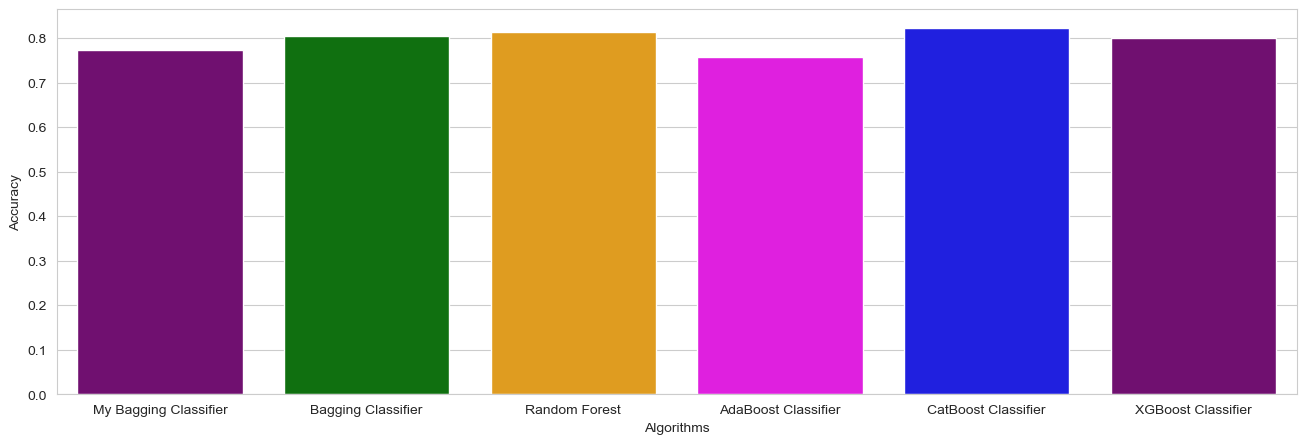

In [55]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
models = {
    'My Bagging': baggingclf,
    'Bagging': bagging,
    'Random Forest': randomforest,
    'AdaBoost': adaboost,
    'CatBoost': catboost,
    'XGBoost': xgboost
}

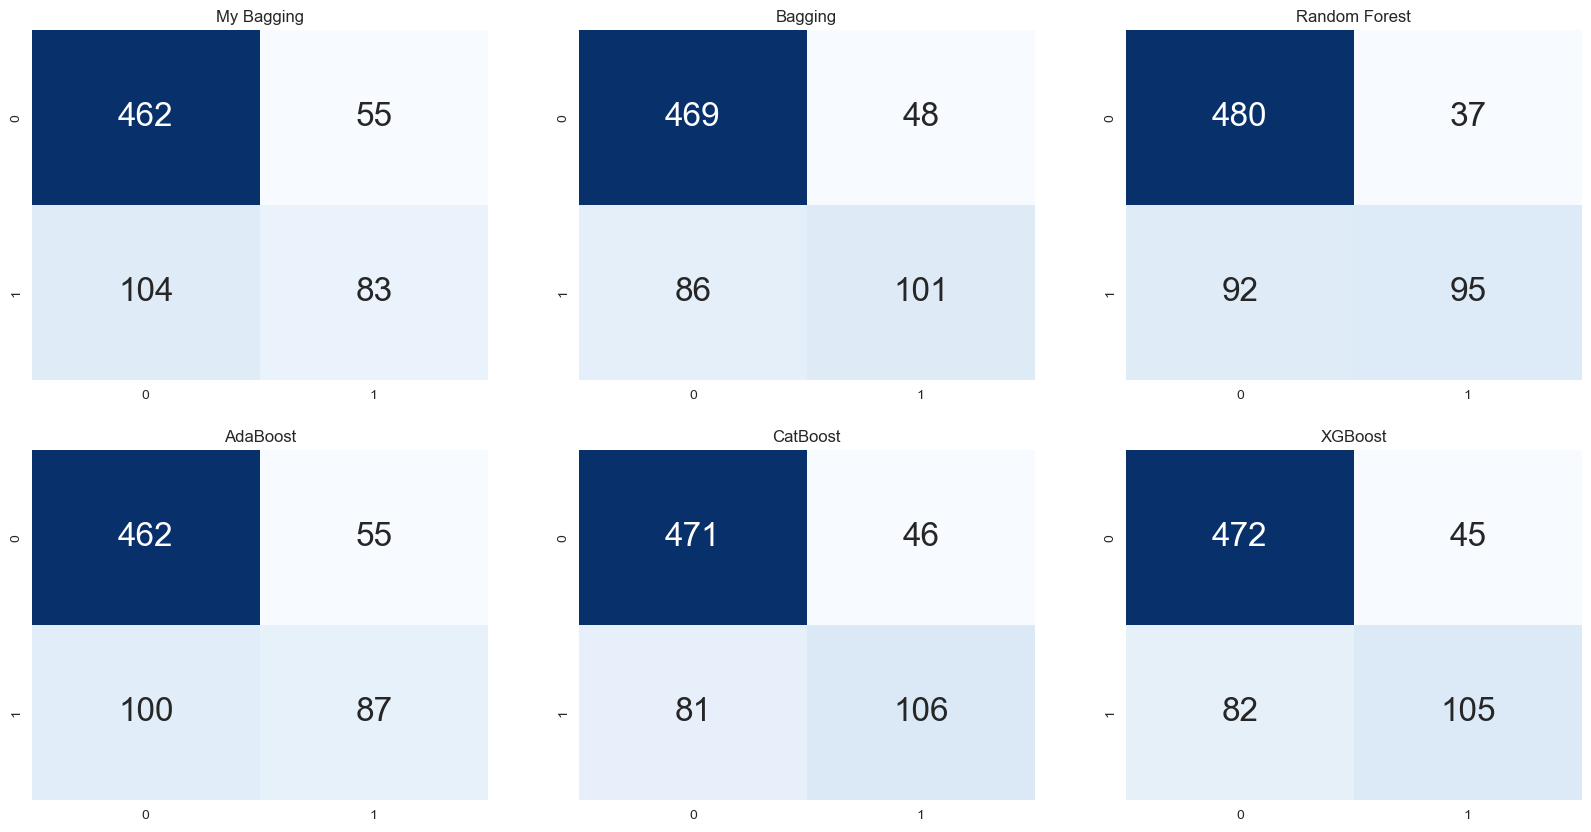

In [58]:
fig,ax=plt.subplots(2, 3, figsize=(20,10))
                    
ax = ax.ravel()
                    
for i, model in enumerate(models.keys()):
    y_true = y_test
    y_pred = models[model].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ax[i].set_title(model)
    sns.heatmap(cm, ax=ax[i], annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Выводы

* По точности предсказаний и матрицам ошибок сложно выделить лучший алгоритм, разница составляет десятые доли процента
* По скорости обучения модели можно выделить XGBoost, CatBoost RandomForest. Худший результат показали AdaBoost и Bagging